In [1]:
from classes.Settings import Settings
from classes.Devices import Devices
from classes.Nodes import Nodes
from classes.Resistors import Resistors
from classes.VoltageSources import VoltageSources
from classes.VoltageSources import CurrentSensor
from scripts.solve import solve

In [2]:
devices = Devices([
    Nodes("gnd"),
    Nodes("a"),
    Nodes("b"),
    Nodes("c"),
    VoltageSources("v-gnd-a", "a", "gnd", 120, 0, 60),
    CurrentSensor("gnd", "b", index=1),
    CurrentSensor("gnd", "c", index=2),
    Resistors("r-a-b", "a", "b", 4),
    Resistors("r-a-b", "a", "c", 5)
])

results = solve(devices, Settings(simulationTime=0.05))

v_waveform_a = results.get_voltage_source_current("v-gnd-a")
v_waveform_b = results.get_voltage_source_current("currentsensor-1")
v_waveform_c = results.get_voltage_source_current("currentsensor-2")

print(max(v_waveform_a))
print(max(v_waveform_b))


76.36752941798578
42.42640523221432


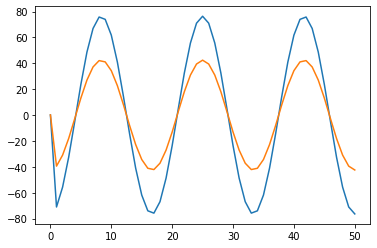

In [3]:
from matplotlib import pyplot as plt 

x = range(len(v_waveform_a))

plt.plot(x, v_waveform_a)
plt.plot(x, v_waveform_b)
plt.show()